In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import io

In [2]:
data = pd.read_csv('D:\\Data\\Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [5]:
df = round(data)
print('Orginal Dataset:')
print('')
df

Orginal Dataset:



,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,Afghanistan,2014,Developing,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,Afghanistan,2013,Developing,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,Afghanistan,2012,Developing,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,Afghanistan,2011,Developing,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,Zimbabwe,2003,Developing,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,Zimbabwe,2002,Developing,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,Zimbabwe,2001,Developing,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


In [6]:
#REMOVE all NaN
df.dropna(subset = ["Country","Year","Status","Life_expect","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"], inplace=True)

In [7]:
#Change Stats from Developing/Developed to 0/1
a = 0
tempStatus = []
for i in df.Status:
    if i == "Developing":
        tempStatus.append(0) 
        a = a+1
    elif i == "Developed":
        tempStatus.append(1)
        a = a+1

df.Status = tempStatus

In [8]:
#TURN Country into number 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [9]:
#To see our dataset after formating
print('Dataset after clearning:')
print('')
df

Dataset after clearning:



,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,0,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,0,2014,0,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,0,2013,0,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,0,2012,0,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,0,2011,0,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,0,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,132,2003,0,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,132,2002,0,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,132,2001,0,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


In [10]:
corr = pd.DataFrame(df.drop('Life_expect', axis=1)).corr() #axis 1 = columns
corr.style.background_gradient(cmap='coolwarm')

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
Country,1.000000,-0.018344,-0.079464,0.096978,-0.026246,-0.108226,-0.122092,0.013179,-0.035006,-0.022682,-0.020630,0.011280,-0.022621,-0.036725,0.148609,-0.118019,-0.018489,-0.026689,0.004386,-0.016205,-0.050765
Year,-0.018344,1.000000,-0.034138,-0.037092,0.008029,-0.112899,0.069562,0.114897,-0.053822,0.005589,0.010479,-0.016699,0.061894,0.029641,-0.123475,0.096421,0.012567,0.023287,0.012403,0.021958,0.083280
Status,-0.079464,-0.034138,1.000000,-0.278173,-0.108757,0.603650,0.461684,0.140351,-0.071963,0.298155,-0.109847,0.201917,0.184183,0.201654,-0.129347,0.484801,-0.034790,-0.303958,-0.307720,0.228885,0.510937
Adult_Mortality,0.096978,-0.037092,-0.278173,1.000000,0.042450,-0.172450,-0.237605,-0.105225,-0.003967,-0.351086,0.060365,-0.199853,-0.080473,-0.191429,0.552159,-0.255034,-0.015012,0.272172,0.284619,-0.425121,-0.417721
infant_deaths,-0.026246,0.008029,-0.108757,0.042450,1.000000,-0.106805,-0.090760,-0.231769,0.532680,-0.234428,0.996906,-0.156929,-0.148666,-0.161871,0.006401,-0.098093,0.671758,0.463200,0.462339,-0.056825,-0.211643
Alcohol,-0.108226,-0.112899,0.603650,-0.172450,-0.106805,1.000000,0.414026,0.112269,-0.049617,0.353508,-0.101441,0.240872,0.212133,0.244308,-0.024821,0.441285,-0.030891,-0.401871,-0.387176,0.350776,0.610711
percentage_expenditure,-0.122092,0.069562,0.461684,-0.237605,-0.090760,0.414026,1.000000,0.016759,-0.063069,0.242560,-0.092153,0.128624,0.179368,0.134810,-0.095237,0.959300,-0.016786,-0.251035,-0.252789,0.199307,0.423599
HepatitisB,0.013179,0.114897,0.140351,-0.105225,-0.231769,0.112269,0.016759,1.000000,-0.124800,0.143377,-0.240766,0.463331,0.110089,0.588990,-0.095331,0.041850,-0.129723,-0.128217,-0.133512,0.223944,0.212167
Measles,-0.035006,-0.053822,-0.071963,-0.003967,0.532680,-0.049617,-0.063069,-0.124800,1.000000,-0.153435,0.517506,-0.057850,-0.106421,-0.058606,-0.003564,-0.064768,0.321946,0.180785,0.174918,-0.010798,-0.112327
BMI,-0.022682,0.005589,0.298155,-0.351086,-0.234428,0.353508,0.242560,0.143377,-0.153435,1.000000,-0.242127,0.186606,0.183288,0.176463,-0.212926,0.265945,-0.081323,-0.547977,-0.553837,0.461031,0.550287


In [11]:
X = df[["Country","Year","Status","Life_expect","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]]
y = df.Life_expect

X_temp = np.array(X).reshape(-1,22)
y_temp = np.array(y).reshape(-1,1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2)

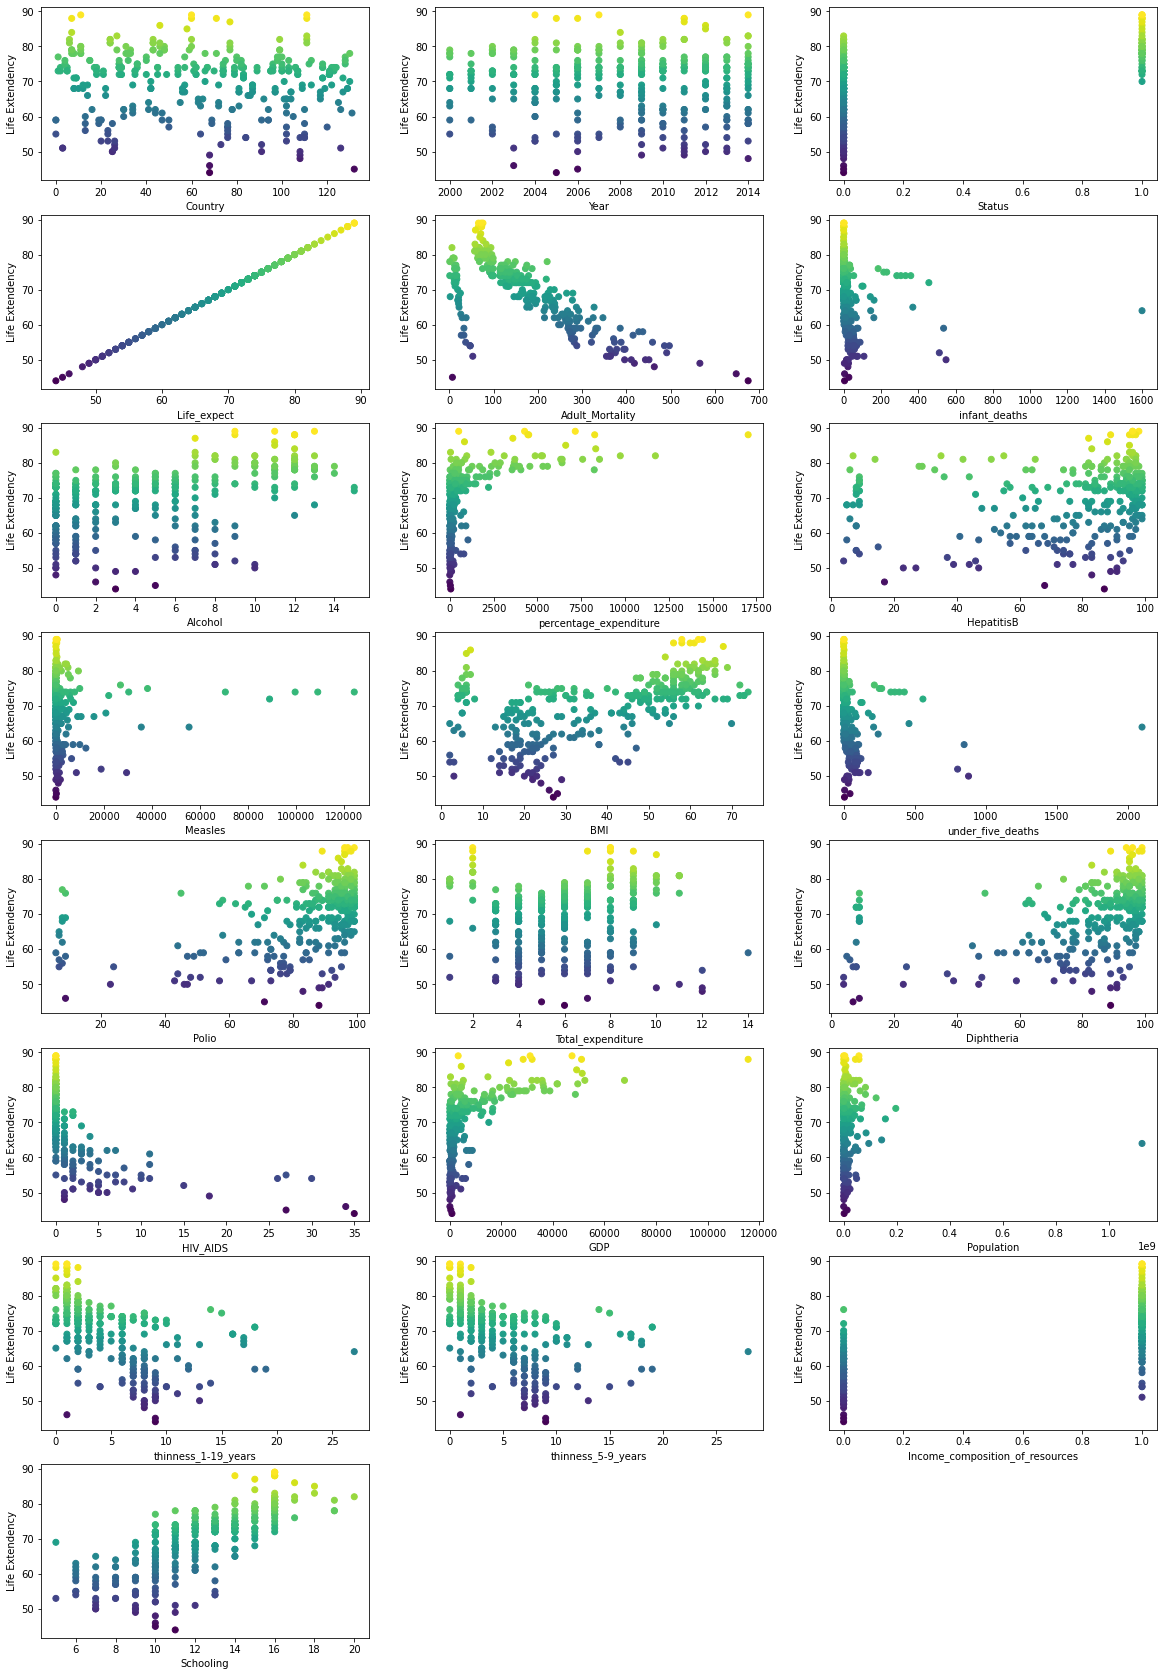

In [13]:
plt_name = ["Country","Year","Status","Life_expect","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]
plt.figure(figsize=(20,30))
for i in range(0,22):
  plt.subplot(8,3,i+1)
  # plt.title(plt_name[i]+'vs Life Extendency')
  plt.xlabel(plt_name[i])
  plt.ylabel('Life Extendency')
  plt.scatter(X_test[:,i],y_test,c=y_test,label='data')
  # plt.scatter(X_test[:,i],y_pred,color='black',label = 'pred')
plt.show()

Feature importance score:

[0.03797275 0.05409238 0.0086033  0.24421028 0.06447077 0.03623202
 0.0380288  0.04014255 0.0330611  0.02998549 0.04533919 0.03747239
 0.03243538 0.03774461 0.0325741  0.02404173 0.04127734 0.03407342
 0.03507151 0.0376571  0.01245269 0.04306113]


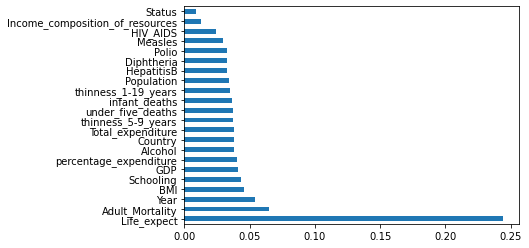

In [14]:
print('Feature importance score:')
print('')

X = df.iloc[:,0:22]         #columns
y = df.iloc[:,3]            #target column

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

In [15]:
print('Feature fitness score:')
print('')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:22]            #columns
y = df.iloc[:,3]               #target column

bestfeatures = SelectKBest(score_func=chi2, k=22)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#connect both data
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(22,'Score'))

Feature fitness score:

                            Feature         Score
17                       Population  2.158103e+10
16                              GDP  1.776961e+07
9                           Measles  3.496988e+06
7            percentage_expenditure  3.182847e+06
11                under_five_deaths  8.446130e+04
4                   Adult_Mortality  8.224754e+04
5                     infant_deaths  5.775827e+04
15                         HIV_AIDS  2.268890e+04
10                              BMI  5.747871e+03
0                           Country  2.370820e+03
19               thinness_5-9_years  1.939629e+03
6                           Alcohol  1.884580e+03
18              thinness_1-19_years  1.867492e+03
3                       Life_expect  1.842903e+03
12                            Polio  1.462188e+03
14                       Diphtheria  1.375944e+03
8                        HepatitisB  1.137094e+03
21                        Schooling  6.593116e+02
2                         

In [16]:
hf_X = df[['Status','Adult_Mortality','infant_deaths','percentage_expenditure','Measles','BMI','under_five_deaths','Total_expenditure','HIV_AIDS','GDP','Income_composition_of_resources','Schooling']]
lf_X = df[["Country","Year","Status","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]]

yd = df.Life_expect


hf_X = np.array(hf_X).reshape(-1,12)
lf_X = np.array(lf_X).reshape(-1,21)
yd = np.array(yd).reshape(-1,1)

In [17]:
from sklearn.decomposition import PCA

In [18]:
X = hf_X
y = yd

In [19]:
X = StandardScaler().fit_transform(X)

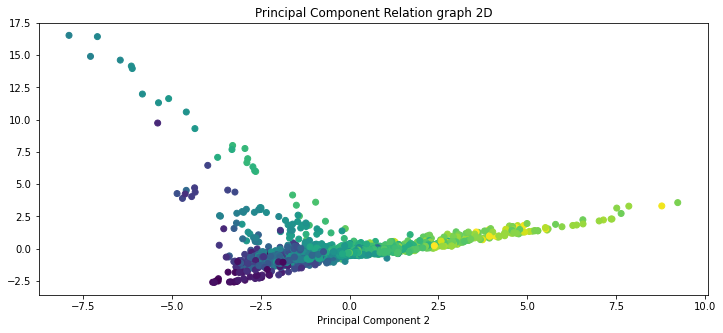

In [20]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

plt.figure(figsize=(12,5))
plt.title('Principal Component Relation graph 2D')
plt.xlabel("Principal Component 1")
plt.xlabel("Principal Component 2")
plt.scatter(X_PCA[:,0],X_PCA[:,1],c = y,label='data')
# plt.scatter(X_test[:,i],y_pred,color='black',label = 'pred')
plt.show()

In [21]:
print(pca.explained_variance_ratio_)
print(pca.components_)
print(pca.mean_)

[0.31907947 0.18914477]
[[ 0.32211015 -0.29022951 -0.22290339  0.34610743 -0.14923631  0.33465263
  -0.22847856  0.16175369 -0.1811508   0.36060224  0.30603742  0.4164091 ]
 [ 0.11783452 -0.19915442  0.56570613  0.1618389   0.43898908  0.00139086
   0.55776714 -0.07515427 -0.16798706  0.16599707  0.16165038  0.09415976]]
[-3.01625176e-17 -7.75607595e-17 -4.30893108e-18 -8.61786217e-18
 -4.30893108e-18  1.72357243e-17 -2.58535865e-17 -6.46339663e-17
  4.30893108e-17  8.61786217e-18 -8.61786217e-17  1.55121519e-16]


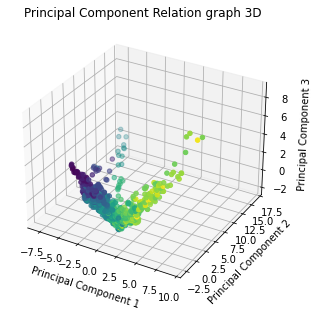

In [22]:
pca = PCA(n_components=3)
pca.fit(X)
X_PCA = pca.transform(X)

plt.figure(figsize=(12,5))
ax = plt.axes(projection='3d')
plt.title('Principal Component Relation graph 3D')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.scatter3D(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2], c=y)

In [23]:
X = hf_X

y = yd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
from sklearn.ensemble import BaggingRegressor
reg = BaggingRegressor(random_state=20)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

yu = y_pred.reshape(-1,1)

C:\Users\MY\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
print(r2_score(y_test,yu))

0.9452659617495148


In [26]:
scores = cross_val_score(reg, X_test, y_test.ravel(), cv=10,scoring= 'r2')

In [27]:
scores

array([0.91750894, 0.86132513, 0.89786902, 0.88532088, 0.90328074,
       0.89238369, 0.89255672, 0.87035607, 0.90280178, 0.79409658])

In [28]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 r2 accuracy with a standard deviation of 0.03


In [29]:
print('Prediction of life expectancy:')
reg.predict([[0,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.1]])

Prediction of life expectancy:


array([62.4])

In [30]:
print('Prediction of life expectancy:')
reg.predict([[0,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]])

Prediction of life expectancy:


array([58.9])

In [31]:
print('Prediction of life expectancy:')
reg.predict([[0,295,87,11.08905273,798,13.4,122,8.82,0.1,198.7285436,0.373,6.5]])

Prediction of life expectancy:


array([56.6])

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mse = mean_squared_error(y_test,y_pred.round())
mse

3.6545454545454548

In [34]:
mae = mean_absolute_error(y_test,y_pred.round())
mae

1.2787878787878788

In [35]:
from math import sqrt 

In [36]:
rmse = sqrt(mean_squared_error(y_test,y_pred.round()))
rmse

1.9116865471476894

In [37]:
yu.round()

array([[71.],
       [74.],
       [75.],
       [51.],
       [74.],
       [73.],
       [75.],
       [73.],
       [68.],
       [72.],
       [76.],
       [73.],
       [74.],
       [72.],
       [63.],
       [72.],
       [67.],
       [72.],
       [74.],
       [75.],
       [66.],
       [69.],
       [71.],
       [75.],
       [61.],
       [65.],
       [83.],
       [70.],
       [74.],
       [77.],
       [73.],
       [72.],
       [72.],
       [56.],
       [73.],
       [66.],
       [72.],
       [74.],
       [72.],
       [74.],
       [68.],
       [71.],
       [81.],
       [74.],
       [74.],
       [78.],
       [72.],
       [58.],
       [66.],
       [75.],
       [74.],
       [73.],
       [69.],
       [70.],
       [64.],
       [65.],
       [72.],
       [74.],
       [63.],
       [72.],
       [81.],
       [72.],
       [76.],
       [74.],
       [68.],
       [82.],
       [71.],
       [64.],
       [77.],
       [74.],
       [71.],
      

In [38]:
y_test

array([[72.],
       [74.],
       [75.],
       [54.],
       [74.],
       [71.],
       [76.],
       [74.],
       [68.],
       [66.],
       [76.],
       [73.],
       [74.],
       [76.],
       [61.],
       [72.],
       [61.],
       [72.],
       [73.],
       [76.],
       [64.],
       [69.],
       [69.],
       [77.],
       [60.],
       [64.],
       [82.],
       [70.],
       [73.],
       [77.],
       [72.],
       [73.],
       [69.],
       [51.],
       [72.],
       [66.],
       [71.],
       [75.],
       [73.],
       [77.],
       [67.],
       [72.],
       [80.],
       [74.],
       [74.],
       [77.],
       [69.],
       [58.],
       [65.],
       [76.],
       [75.],
       [74.],
       [69.],
       [71.],
       [67.],
       [65.],
       [72.],
       [73.],
       [62.],
       [72.],
       [78.],
       [72.],
       [79.],
       [76.],
       [68.],
       [83.],
       [71.],
       [64.],
       [77.],
       [75.],
       [70.],
      

In [39]:
# def MAPE(y_test, yu):
# y_test, yu.round() = np.array(y_test), np.array(yu)
mape = ((y_test - yu.round()) / y_test)
mape.mean()

-0.0028524021648043798

In [40]:
y_pred = reg.predict(X_test)
y_pred.round()

array([71., 74., 75., 51., 74., 73., 75., 73., 68., 72., 76., 73., 74.,
       72., 63., 72., 67., 72., 74., 75., 66., 69., 71., 75., 61., 65.,
       83., 70., 74., 77., 73., 72., 72., 56., 73., 66., 72., 74., 72.,
       74., 68., 71., 81., 74., 74., 78., 72., 58., 66., 75., 74., 73.,
       69., 70., 64., 65., 72., 74., 63., 72., 81., 72., 76., 74., 68.,
       82., 71., 64., 77., 74., 71., 68., 58., 72., 70., 72., 70., 69.,
       74., 75., 58., 71., 76., 73., 69., 82., 72., 82., 67., 78., 73.,
       85., 60., 55., 84., 82., 69., 69., 83., 76., 81., 50., 74., 67.,
       65., 74., 77., 62., 68., 57., 82., 74., 67., 73., 64., 73., 74.,
       70., 76., 73., 83., 64., 76., 58., 66., 66., 84., 81., 68., 84.,
       55., 67., 80., 70., 58., 71., 45., 71., 65., 74., 52., 63., 74.,
       63., 83., 53., 54., 75., 73., 74., 58., 74., 70., 66., 73., 59.,
       57., 55., 64., 75., 64., 55., 73., 75., 68., 80., 65., 68., 75.,
       72., 73., 68., 73., 56., 80., 60., 73., 68., 82., 75., 70

In [41]:
y_test

array([[72.],
       [74.],
       [75.],
       [54.],
       [74.],
       [71.],
       [76.],
       [74.],
       [68.],
       [66.],
       [76.],
       [73.],
       [74.],
       [76.],
       [61.],
       [72.],
       [61.],
       [72.],
       [73.],
       [76.],
       [64.],
       [69.],
       [69.],
       [77.],
       [60.],
       [64.],
       [82.],
       [70.],
       [73.],
       [77.],
       [72.],
       [73.],
       [69.],
       [51.],
       [72.],
       [66.],
       [71.],
       [75.],
       [73.],
       [77.],
       [67.],
       [72.],
       [80.],
       [74.],
       [74.],
       [77.],
       [69.],
       [58.],
       [65.],
       [76.],
       [75.],
       [74.],
       [69.],
       [71.],
       [67.],
       [65.],
       [72.],
       [73.],
       [62.],
       [72.],
       [78.],
       [72.],
       [79.],
       [76.],
       [68.],
       [83.],
       [71.],
       [64.],
       [77.],
       [75.],
       [70.],
      

In [42]:
import numpy as np

def mape(y_test, yu):
    y_test, yu = np.array(y_test), np.array(yu)
    mape = np.mean(np.abs((y_test - yu) / y_test))
    return mape

In [43]:
MAPE = mape(y_test,yu)
MAPE

0.019085362450711508